<a href="https://colab.research.google.com/github/Amanr1996/Airbnb-EDA/blob/main/Airbnb_initial_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# Load the Airbnb data into a pandas dataframe
airbnb_data = pd.read_csv('/content/Airbnb NYC 2019.csv')



In [4]:
# Determine the most popular neighborhoods
neighbourhood_counts = airbnb_data['neighbourhood'].value_counts()
top_neighbourhoods = neighbourhood_counts.head(10)
print(top_neighbourhoods)



Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64


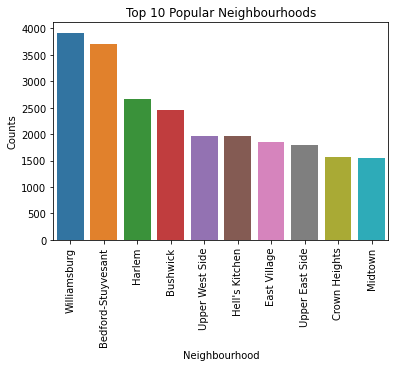

In [5]:
# Plot the top neighbourhoods
sns.barplot(x=top_neighbourhoods.index, y=top_neighbourhoods.values)
plt.xlabel('Neighbourhood')
plt.ylabel('Counts')
plt.title('Top 10 Popular Neighbourhoods')
plt.xticks(rotation=90)
plt.show()



In [6]:
# Determine the most popular room types
room_type_counts = airbnb_data['room_type'].value_counts()



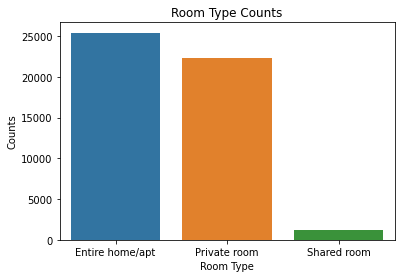

In [7]:
# Plot the room type counts
sns.barplot(x=room_type_counts.index, y=room_type_counts.values)
plt.xlabel('Room Type')
plt.ylabel('Counts')
plt.title('Room Type Counts')
plt.show()



In [8]:
# Determine the most popular price ranges
price_ranges = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, np.inf]
airbnb_data['price_range'] = pd.cut(airbnb_data['price'], bins=price_ranges, labels=False)
price_range_counts = airbnb_data['price_range'].value_counts().sort_index()



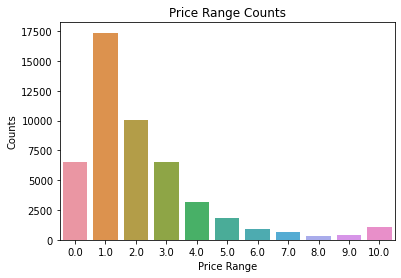

In [9]:
# Plot the price range counts
sns.barplot(x=price_range_counts.index, y=price_range_counts.values)
plt.xlabel('Price Range')
plt.ylabel('Counts')
plt.title('Price Range Counts')
plt.show()

Host analysis: Identify the most active hosts, their listing characteristics, and their impact on revenue to support the development of effective hosting strategies.

In [14]:
# Identify the most active hosts
host_activity = airbnb_data.groupby(['host_id', 'host_name'])['id'].agg(['count']).reset_index()
most_active_hosts = host_activity.sort_values('count', ascending=False).head(10)





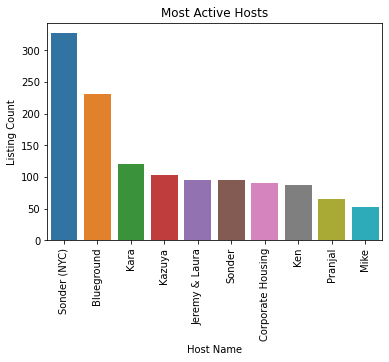

In [15]:
# Plot the most active hosts
sns.barplot(x=most_active_hosts['host_name'], y=most_active_hosts['count'])
plt.xlabel('Host Name')
plt.ylabel('Listing Count')
plt.title('Most Active Hosts')
plt.xticks(rotation=90)
plt.show()



In [16]:
# Analyze the listing characteristics of the most active hosts
most_active_hosts_listings = airbnb_data[airbnb_data['host_id'].isin(most_active_hosts['host_id'])]
listing_characteristics = most_active_hosts_listings.groupby(['host_id', 'room_type'])['price'].agg(['mean', 'count']).reset_index()



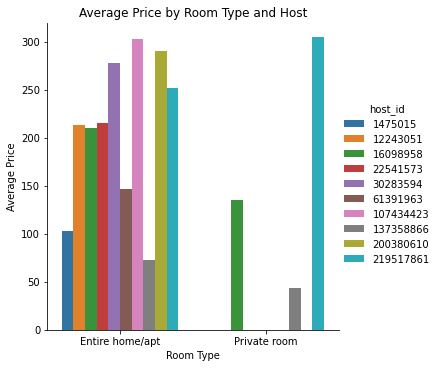

In [17]:
# Plot the average price by room type and host
sns.catplot(x="room_type", y="mean", hue="host_id", kind="bar", data=listing_characteristics)
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.title('Average Price by Room Type and Host')
plt.show()



In [18]:
# Analyze the impact of the most active hosts on revenue
host_revenue = most_active_hosts_listings.groupby(['host_id'])['price'].agg(['sum']).reset_index()



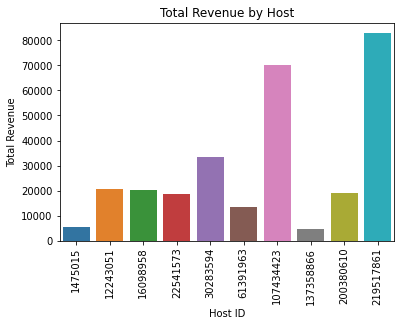

In [19]:
# Plot the total revenue by host
sns.barplot(x=host_revenue['host_id'], y=host_revenue['sum'])
plt.xlabel('Host ID')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Host')
plt.xticks(rotation=90)
plt.show()

Revenue optimization: Analyze the pricing trends, seasonality patterns, and availability data to determine the optimal pricing strategy for increasing revenue.


In [20]:
# Analyze the pricing trends
price_trends = airbnb_data.groupby(['neighbourhood_group', 'room_type'])['price'].agg(['mean']).reset_index()



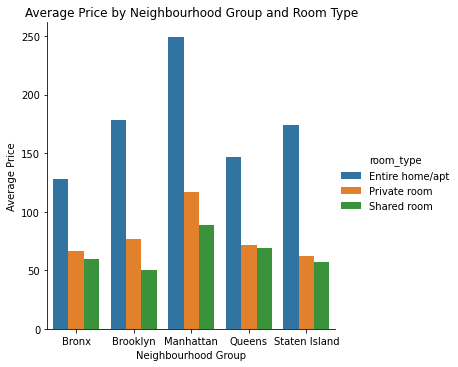

In [21]:
# Plot the average price by neighbourhood group and room type
sns.catplot(x="neighbourhood_group", y="mean", hue="room_type", kind="bar", data=price_trends)
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Price')
plt.title('Average Price by Neighbourhood Group and Room Type')
plt.show()



In [22]:
# Analyze the seasonality patterns
airbnb_data['date'] = pd.to_datetime(airbnb_data['last_review'])
airbnb_data['month'] = airbnb_data['date'].dt.month



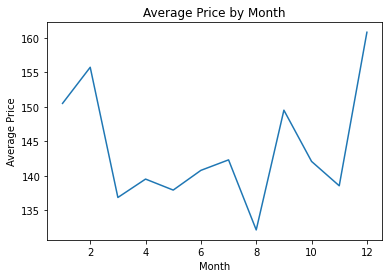

In [23]:
# Plot the average price by month
price_by_month = airbnb_data.groupby(['month'])['price'].agg(['mean']).reset_index()
sns.lineplot(x=price_by_month['month'], y=price_by_month['mean'])
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.title('Average Price by Month')
plt.show()



In [24]:
# Analyze the availability data
availability_data = airbnb_data.groupby(['neighbourhood_group', 'room_type'])['availability_365'].agg(['mean']).reset_index()



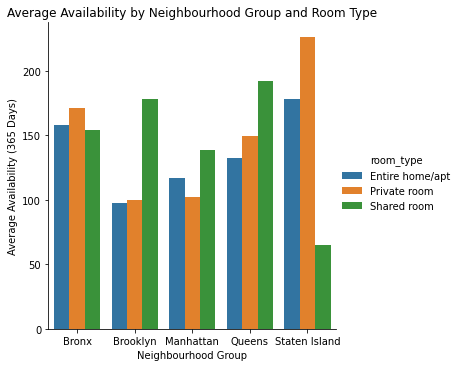

In [25]:
# Plot the average availability by neighbourhood group and room type
sns.catplot(x="neighbourhood_group", y="mean", hue="room_type", kind="bar", data=availability_data)
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Availability (365 Days)')
plt.title('Average Availability by Neighbourhood Group and Room Type')
plt.show()

Customer behavior: Analyze customer behavior patterns such as booking frequency, preferred room types, and minimum night stays to improve the customer experience.

In [26]:
# Analyze booking frequency
booking_frequency = airbnb_data.groupby(['room_type', 'neighbourhood'])['minimum_nights'].agg(['count']).reset_index()



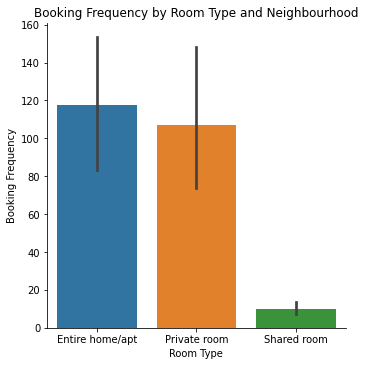

In [28]:
# Plot the booking frequency by room type and neighbourhood
sns.catplot(x="room_type", y="count", kind="bar", data=booking_frequency)
plt.xlabel('Room Type')
plt.ylabel('Booking Frequency')
plt.title('Booking Frequency by Room Type and Neighbourhood')
plt.show()



In [29]:
# Analyze preferred room types
room_type_counts = airbnb_data['room_type'].value_counts()



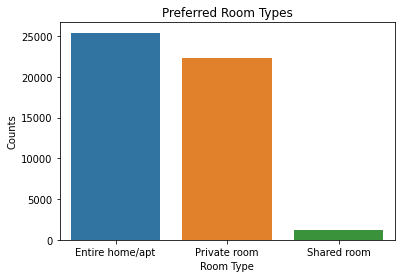

In [30]:
# Plot the preferred room types
sns.barplot(x=room_type_counts.index, y=room_type_counts.values)
plt.xlabel('Room Type')
plt.ylabel('Counts')
plt.title('Preferred Room Types')
plt.show()



In [31]:
# Analyze minimum night stays
minimum_nights = airbnb_data['minimum_nights'].value_counts().sort_index()



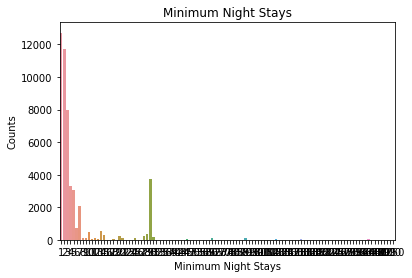

In [32]:
# Plot the minimum night stays
sns.barplot(x=minimum_nights.index, y=minimum_nights.values)
plt.xlabel('Minimum Night Stays')
plt.ylabel('Counts')
plt.title('Minimum Night Stays')
plt.show()